In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

In [2]:
! pip install lazypredict # numpy==1.23.5

In [3]:
! pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 26.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.2 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


In [4]:
url_dataset = '/kaggle/input/ian-sarna-fvs/_6_dRules_lbl_fvs.csv'
df_main = pd.read_csv(url_dataset, header=0)

df_main = df_main.fillna(0)

In [5]:
df_main.head()

,1stU,GC_Per,GC_Per1,GC_Flag,ntReps,dintReps,trintReps,b7_U,b4-8,s_5Bar,labels
0,1,0.00,47.37,1,1,1,1.0,0,0,-1,1
1,1,0.00,47.37,1,1,1,1.0,0,0,-1,0
2,0,0.00,47.37,1,1,1,1.0,1,0,-1,1
3,1,0.00,47.37,1,1,1,1.0,0,0,1,1
4,1,5.26,52.63,1,1,1,1.0,0,0,-1,1


In [52]:
X = df_main.iloc[:,:-1]
y = df_main.iloc[:,-1]

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
labels = y = encoder.fit_transform(y)
print(y)

[1 0 1 ... 1 1 1]


In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

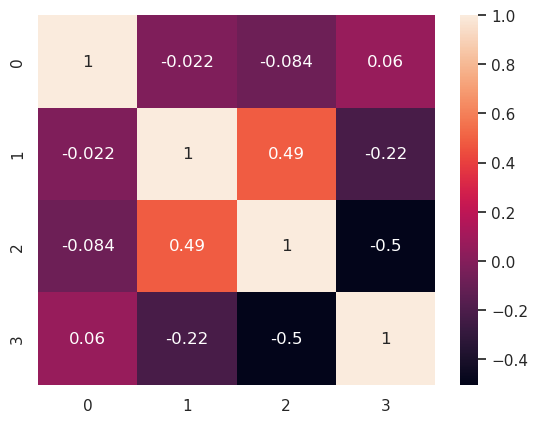

In [54]:
import seaborn as sns
 
# checking correlation using heatmap 
#plotting the heatmap for correlation
attributes = ['1stU','GC_Per','GC_Per1','GC_Flag']
ax = sns.heatmap(pd.DataFrame(X_train[:,:4]).corr(), annot=True)

array([[<Axes: xlabel='1stU', ylabel='1stU'>,
        <Axes: xlabel='GC_Per', ylabel='1stU'>,
        <Axes: xlabel='GC_Per1', ylabel='1stU'>,
        <Axes: xlabel='GC_Flag', ylabel='1stU'>],
       [<Axes: xlabel='1stU', ylabel='GC_Per'>,
        <Axes: xlabel='GC_Per', ylabel='GC_Per'>,
        <Axes: xlabel='GC_Per1', ylabel='GC_Per'>,
        <Axes: xlabel='GC_Flag', ylabel='GC_Per'>],
       [<Axes: xlabel='1stU', ylabel='GC_Per1'>,
        <Axes: xlabel='GC_Per', ylabel='GC_Per1'>,
        <Axes: xlabel='GC_Per1', ylabel='GC_Per1'>,
        <Axes: xlabel='GC_Flag', ylabel='GC_Per1'>],
       [<Axes: xlabel='1stU', ylabel='GC_Flag'>,
        <Axes: xlabel='GC_Per', ylabel='GC_Flag'>,
        <Axes: xlabel='GC_Per1', ylabel='GC_Flag'>,
        <Axes: xlabel='GC_Flag', ylabel='GC_Flag'>]], dtype=object)

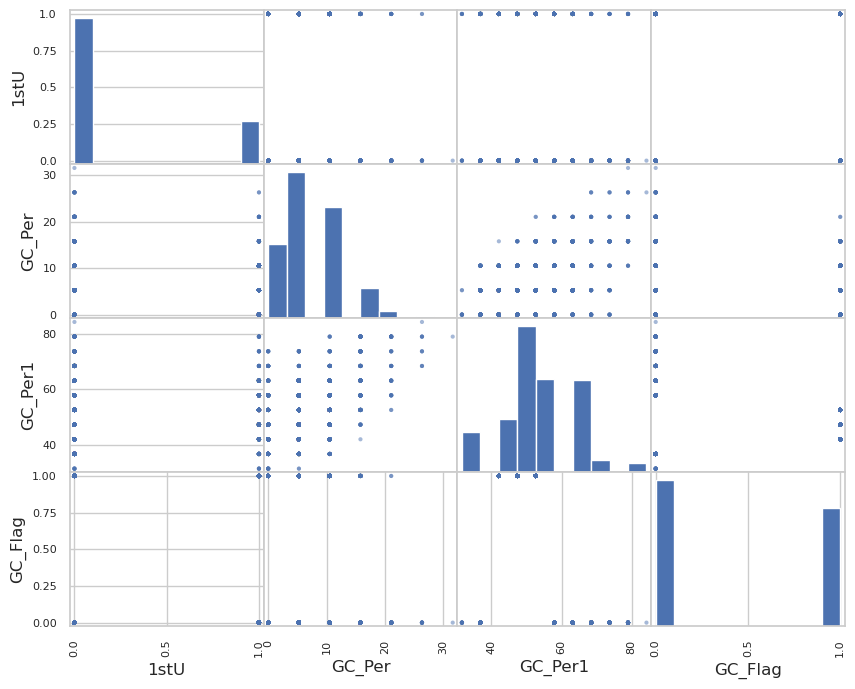

In [55]:
from pandas.plotting import scatter_matrix
attributes = ['1stU','GC_Per','GC_Per1','GC_Flag']
scatter_matrix(df_main[attributes], figsize = (10,8))

# Classification with dbRules

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('LinearSVC', sklearn.svm._classes.LinearSVC),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('NearestCentroid', sklearn.neighbors._nearest_centroid.NearestCentroid),
 ('NuSVC', sklearn.svm._classes.NuSVC),
 ('PassiveAggressiveClassifier',
  sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier),
 ('Perceptron', sklearn.linear_model._perceptron.Perceptron),
 ('QuadraticDiscriminantAnalysis',
  sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis),
 ('RandomForestClassifier', sklearn.ensemble._forest.RandomForestClassifier),
 ('RidgeClassifier', sklearn.linear_model._ridge.RidgeClassifier),
 ('RidgeClassifierCV', sklearn.linear_model._ridge.RidgeClassifierCV),
 ('SGDClassifier', sklearn.linear_model._stochastic_gradient.SGDClassifier),
 ('SVC', sklearn.svm._classes.SVC),
 ('StackingClassifier', sklearn.ensemble._stacking.StackingClassifier),
 ('XGBClassifier', xgboost.sklearn.XGBClassifier),
 ('LGBMClassifier', lightgbm.sklearn.LGBMClassifier)]

In [56]:
import sklearn
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
lazyClf = [('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LinearSVC', sklearn.svm._classes.LinearSVC),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('NuSVC', sklearn.svm._classes.NuSVC),
 ('Perceptron', sklearn.linear_model._perceptron.Perceptron),
 ('RandomForestClassifier', sklearn.ensemble._forest.RandomForestClassifier),
 ('SGDClassifier', sklearn.linear_model._stochastic_gradient.SGDClassifier),
 ('SVC', sklearn.svm._classes.SVC),
 ('XGBClassifier', XGBClassifier),
 ('LGBMClassifier', LGBMClassifier)]

In [57]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
# lazypredict.Supervised.CLASSIFIERS[:]
lazypredict.Supervised.CLASSIFIERS = lazyClf
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:03<00:00,  4.90it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:02<00:00,  5.85it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.66,0.64,0.64,0.65,0.02
ExtraTreeClassifier,0.66,0.64,0.64,0.65,0.02
ExtraTreesClassifier,0.66,0.64,0.64,0.65,0.31
RandomForestClassifier,0.66,0.64,0.64,0.64,0.43
XGBClassifier,0.65,0.63,0.63,0.64,0.20
BaggingClassifier,0.65,0.63,0.63,0.64,0.07
LGBMClassifier,0.64,0.62,0.62,0.63,0.78
KNeighborsClassifier,0.61,0.60,0.60,0.61,0.18
SVC,0.60,0.57,0.57,0.56,0.38


In [58]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.58,0.57,0.57,0.54,0.17
SVC,0.55,0.54,0.54,0.51,0.19
LGBMClassifier,0.54,0.54,0.54,0.53,0.76
XGBClassifier,0.54,0.53,0.53,0.52,0.20
RandomForestClassifier,0.54,0.53,0.53,0.51,0.35
GaussianNB,0.55,0.53,0.53,0.44,0.02
BaggingClassifier,0.54,0.53,0.53,0.51,0.06
DecisionTreeClassifier,0.53,0.53,0.53,0.52,0.02
ExtraTreesClassifier,0.53,0.52,0.52,0.52,0.29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'DecisionTreeClassifier'),
  Text(1, 0, 'ExtraTreeClassifier'),
  Text(2, 0, 'ExtraTreesClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'XGBClassifier'),
  Text(5, 0, 'BaggingClassifier'),
  Text(6, 0, 'LGBMClassifier'),
  Text(7, 0, 'KNeighborsClassifier'),
  Text(8, 0, 'SVC'),
  Text(9, 0, 'NuSVC'),
  Text(10, 0, 'AdaBoostClassifier'),
  Text(11, 0, 'Perceptron'),
  Text(12, 0, 'GaussianNB'),
  Text(13, 0, 'LogisticRegression'),
  Text(14, 0, 'LinearSVC'),
  Text(15, 0, 'SGDClassifier')])

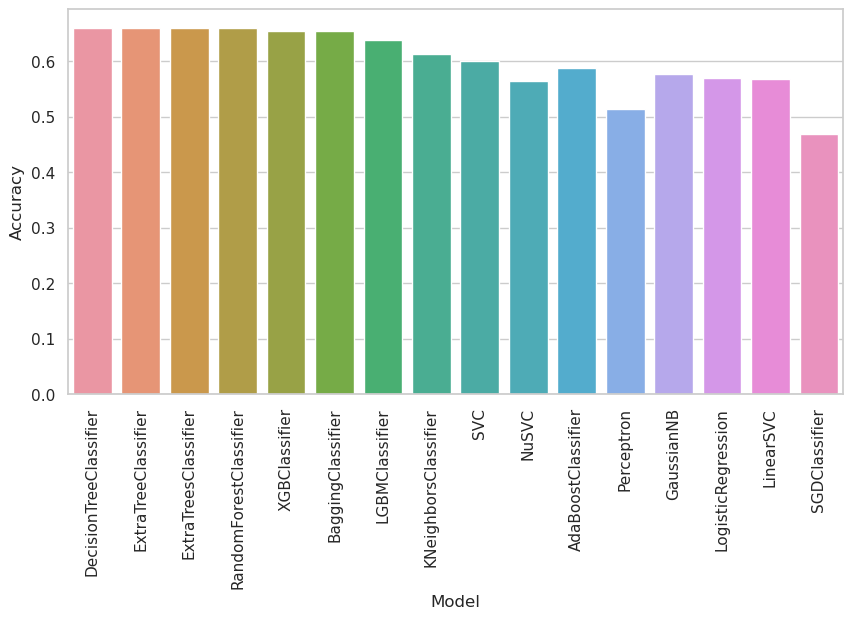

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'AdaBoostClassifier'),
  Text(1, 0, 'SVC'),
  Text(2, 0, 'LGBMClassifier'),
  Text(3, 0, 'XGBClassifier'),
  Text(4, 0, 'RandomForestClassifier'),
  Text(5, 0, 'GaussianNB'),
  Text(6, 0, 'BaggingClassifier'),
  Text(7, 0, 'DecisionTreeClassifier'),
  Text(8, 0, 'ExtraTreesClassifier'),
  Text(9, 0, 'KNeighborsClassifier'),
  Text(10, 0, 'NuSVC'),
  Text(11, 0, 'ExtraTreeClassifier'),
  Text(12, 0, 'Perceptron'),
  Text(13, 0, 'LogisticRegression'),
  Text(14, 0, 'LinearSVC'),
  Text(15, 0, 'SGDClassifier')])

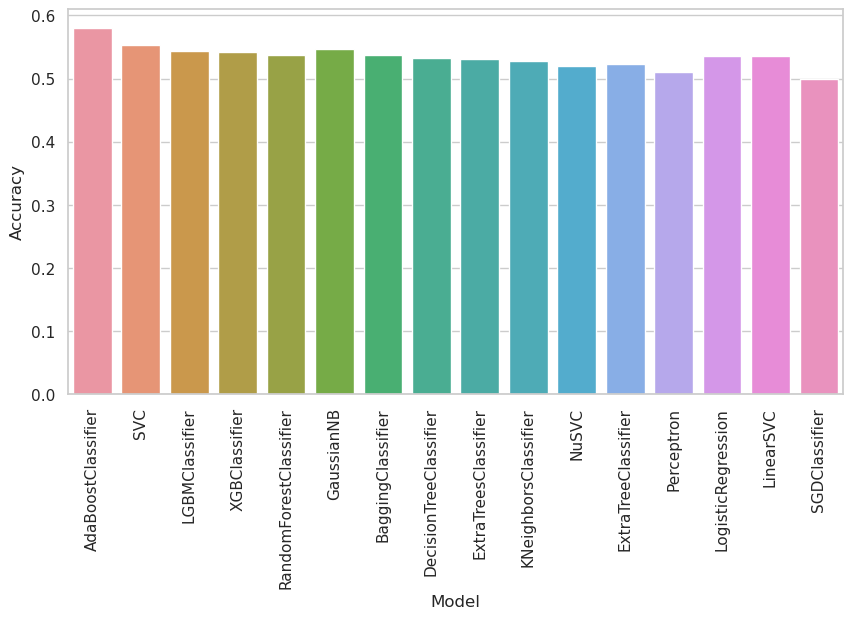

In [60]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

# plt.figure(figsize=(5, 10))
# sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_test.index, y="Accuracy", data=models_test)
# ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)

# Classification with kmers

In [61]:
df_kmer.head()

,freq_A,freq_C,freq_G,freq_T,freq_AA,freq_AC,freq_AT,freq_AG,freq_CA,freq_CC,...,freq_TCG,freq_TCT,freq_TGA,freq_TGC,freq_TGG,freq_TGT,freq_TTA,freq_TTC,freq_TTG,freq_TTT
0,21.05,36.84,10.53,31.58,0.00,10.53,10.53,0.00,10.53,15.79,...,0.00,0.00,0.00,0.00,5.26,0.00,0.00,5.26,0.00,0.00
1,26.32,0.00,47.37,26.32,10.53,0.00,5.26,5.26,0.00,0.00,...,0.00,0.00,0.00,0.00,10.53,0.00,0.00,0.00,5.26,5.26
2,10.53,10.53,36.84,42.11,0.00,5.26,5.26,0.00,5.26,0.00,...,0.00,0.00,0.00,0.00,10.53,0.00,0.00,5.26,5.26,10.53
3,31.58,10.53,36.84,21.05,0.00,5.26,5.26,15.79,5.26,0.00,...,0.00,0.00,5.26,0.00,0.00,5.26,0.00,0.00,0.00,0.00
4,15.79,42.11,10.53,31.58,0.00,5.26,5.26,0.00,10.53,15.79,...,0.00,0.00,0.00,0.00,5.26,0.00,0.00,5.26,0.00,0.00


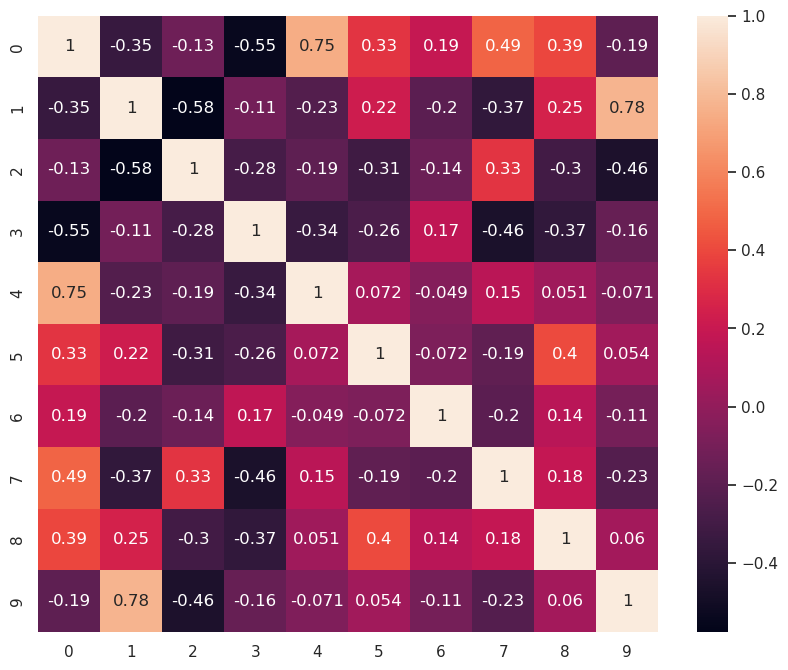

In [62]:
X = df_kmer.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pd.DataFrame(X_train[:,:10]).corr(), annot=True, )

In [63]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:06<00:00,  2.65it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:05<00:00,  2.98it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.06
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.03
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.59
RandomForestClassifier,1.00,1.00,1.00,1.00,0.69
BaggingClassifier,0.99,0.99,0.99,0.99,0.26
XGBClassifier,0.98,0.98,0.98,0.98,0.91
LGBMClassifier,0.94,0.94,0.94,0.94,0.93
NuSVC,0.89,0.89,0.89,0.89,0.59
SVC,0.82,0.82,0.82,0.82,0.54


In [64]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.74,0.73,0.73,0.74,0.42
RandomForestClassifier,0.73,0.73,0.73,0.73,0.70
XGBClassifier,0.73,0.73,0.73,0.73,0.91
ExtraTreesClassifier,0.73,0.73,0.73,0.73,0.56
LGBMClassifier,0.73,0.72,0.72,0.72,0.79
BaggingClassifier,0.72,0.72,0.72,0.72,0.25
KNeighborsClassifier,0.71,0.71,0.71,0.71,0.06
SVC,0.70,0.69,0.69,0.69,0.36
DecisionTreeClassifier,0.66,0.66,0.66,0.66,0.06


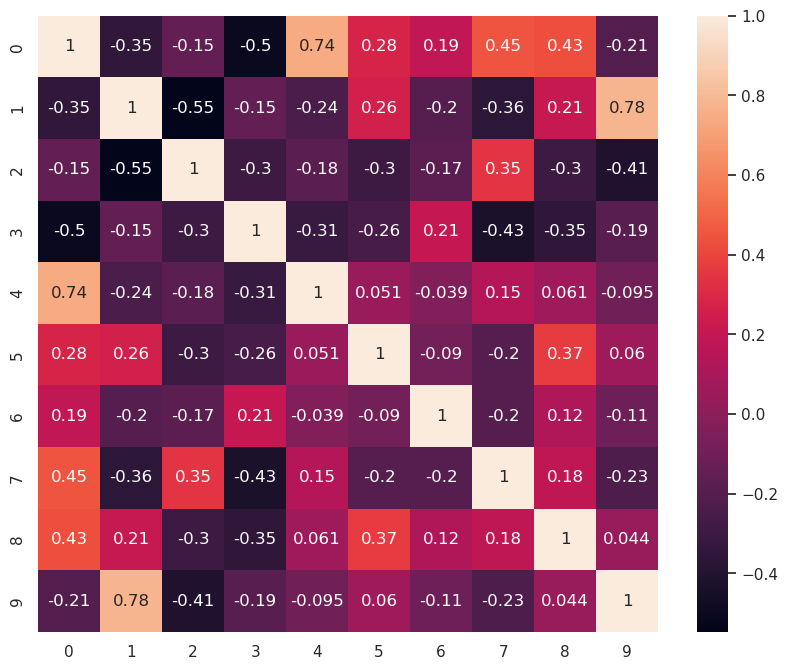

In [65]:
url_dataset = '/kaggle/input/ian-sarna-fvs/_3_LCnM_fvs.csv'
df_LCnM = pd.read_csv(url_dataset, header=0)

df_LCnM = df_LCnM.fillna(0)

X = df_LCnM.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pd.DataFrame(X_train[:,:10]).corr(), annot=True, )

In [67]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:34<00:00,  2.14s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.75
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.09
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.09
RandomForestClassifier,1.00,1.00,1.00,1.00,2.56
XGBClassifier,1.00,1.00,1.00,1.00,10.91
LGBMClassifier,1.00,1.00,1.00,1.00,3.15
BaggingClassifier,0.99,0.99,0.99,0.99,5.08
NuSVC,0.98,0.98,0.98,0.98,2.13
SVC,0.85,0.83,0.83,0.84,2.23


In [68]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.70,0.69,0.69,0.69,0.99
NuSVC,0.69,0.68,0.68,0.69,1.12
LGBMClassifier,0.68,0.67,0.67,0.67,4.15
XGBClassifier,0.66,0.65,0.65,0.65,10.69
SVC,0.65,0.65,0.65,0.64,1.03
DecisionTreeClassifier,0.64,0.64,0.64,0.64,0.75
BaggingClassifier,0.62,0.62,0.62,0.62,4.85
RandomForestClassifier,0.63,0.62,0.62,0.62,2.51
KNeighborsClassifier,0.61,0.61,0.61,0.61,0.12


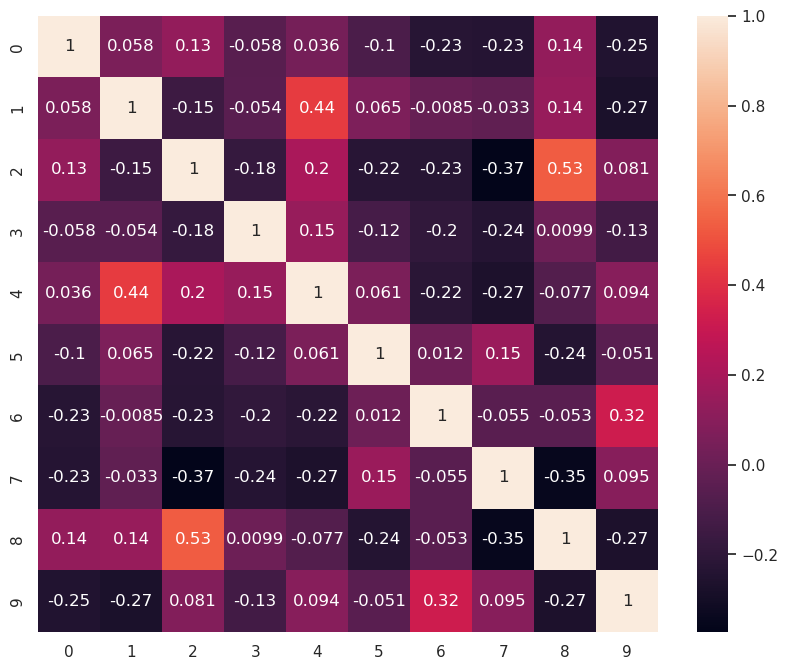

In [69]:
url_dataset = '/kaggle/input/ian-sarna-fvs/_4_PC_Pse_KNC.csv'
df_PC = pd.read_csv(url_dataset, header=0)

df_PC = df_PC.fillna(0)

X = df_PC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pd.DataFrame(X_train[:,:10]).corr(), annot=True, )

In [70]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:04<00:00,  3.21it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:04<00:00,  3.54it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.06
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.02
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.49
XGBClassifier,1.00,1.00,1.00,1.00,0.77
RandomForestClassifier,1.00,1.00,1.00,1.00,0.93
LGBMClassifier,0.99,0.99,0.99,0.99,0.70
BaggingClassifier,0.98,0.98,0.98,0.98,0.30
NuSVC,0.90,0.90,0.90,0.90,0.40
KNeighborsClassifier,0.81,0.80,0.80,0.81,0.15


In [71]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.72,0.72,0.72,0.72,0.45
KNeighborsClassifier,0.71,0.71,0.71,0.71,0.05
RandomForestClassifier,0.70,0.70,0.70,0.70,0.92
LGBMClassifier,0.68,0.68,0.68,0.68,0.66
NuSVC,0.68,0.68,0.68,0.68,0.31
XGBClassifier,0.68,0.68,0.68,0.68,0.76
SVC,0.66,0.65,0.65,0.65,0.26
BaggingClassifier,0.65,0.65,0.65,0.65,0.30
AdaBoostClassifier,0.65,0.64,0.64,0.64,0.37


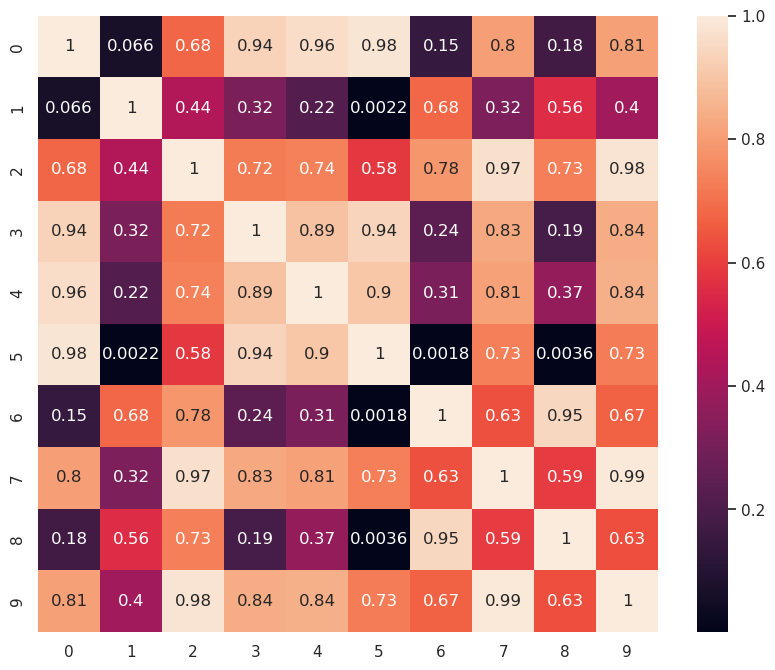

In [72]:
url_dataset = '/kaggle/input/ian-sarna-fvs/_5_SC_Pse_KNC.csv'
df_SC = pd.read_csv(url_dataset, header=0)

df_SC = df_SC.fillna(0)

X = df_SC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pd.DataFrame(X_train[:,:10]).corr(), annot=True, )

In [73]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:14<00:00,  1.07it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:14<00:00,  1.13it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.25
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.04
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.76
XGBClassifier,1.00,1.00,1.00,1.00,4.40
RandomForestClassifier,1.00,1.00,1.00,1.00,1.84
LGBMClassifier,1.00,1.00,1.00,1.00,1.45
BaggingClassifier,0.99,0.99,0.99,0.99,1.71
KNeighborsClassifier,0.79,0.79,0.79,0.79,0.19
AdaBoostClassifier,0.75,0.74,0.74,0.74,1.70


In [74]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.71,0.70,0.70,0.70,1.80
ExtraTreesClassifier,0.70,0.70,0.70,0.70,0.74
LGBMClassifier,0.69,0.69,0.69,0.69,1.45
XGBClassifier,0.67,0.67,0.67,0.67,4.44
BaggingClassifier,0.67,0.67,0.67,0.67,1.60
KNeighborsClassifier,0.67,0.67,0.67,0.67,0.07
ExtraTreeClassifier,0.63,0.63,0.63,0.63,0.03
DecisionTreeClassifier,0.62,0.62,0.62,0.62,0.24
NuSVC,0.61,0.60,0.60,0.60,0.38


In [80]:
df_kmer_LCnM = pd.concat([df_kmer,df_LCnM], axis=1)
print(df_kmer_LCnM.head())

X = df_kmer_LCnM.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   freq_A  freq_C  freq_G  freq_T  freq_AA  freq_AC  freq_AT  freq_AG  \
0   21.05   36.84   10.53   31.58     0.00    10.53    10.53     0.00   
1   26.32    0.00   47.37   26.32    10.53     0.00     5.26     5.26   
2   10.53   10.53   36.84   42.11     0.00     5.26     5.26     0.00   
3   31.58   10.53   36.84   21.05     0.00     5.26     5.26    15.79   
4   15.79   42.11   10.53   31.58     0.00     5.26     5.26     0.00   

   freq_CA  freq_CC  ...  SVV_9  SVV_10  SVV_11  SVV_12  SVV_13  SVV_14  \
0    10.53    15.79  ...      2       1       4       2       1       4   
1     0.00     0.00  ...      1       3       3       3       4       4   
2     5.26     0.00  ...      3       3       4       4       4       4   
3     5.26     0.00  ...      3       1       4       1       2       4   
4    10.53    15.79  ...      4       3       3       2       4       1   

   SVV_15  SVV_16  SVV_17  SVV_18  
0       1       2       2       4  
1       4       3       3       1  
2 

In [81]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:39<00:00,  2.46s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:36<00:00,  2.27s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.79
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.11
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.14
RandomForestClassifier,1.00,1.00,1.00,1.00,2.55
LGBMClassifier,1.00,1.00,1.00,1.00,3.81
XGBClassifier,1.00,1.00,1.00,1.00,11.70
BaggingClassifier,0.99,0.99,0.99,0.99,5.02
NuSVC,0.98,0.98,0.98,0.98,2.38
SVC,0.85,0.84,0.84,0.85,2.31


In [82]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.70,0.70,0.70,0.70,1.25
ExtraTreesClassifier,0.70,0.70,0.70,0.70,1.07
SVC,0.68,0.67,0.67,0.67,1.17
KNeighborsClassifier,0.67,0.67,0.67,0.67,0.13
LGBMClassifier,0.66,0.65,0.65,0.65,3.66
XGBClassifier,0.66,0.65,0.65,0.65,11.88
RandomForestClassifier,0.64,0.63,0.63,0.63,2.52
BaggingClassifier,0.63,0.63,0.63,0.63,4.93
ExtraTreeClassifier,0.61,0.61,0.61,0.61,0.08


In [83]:
df_kmer_PC = pd.concat([df_kmer,df_PC], axis=1)
print(df_kmer_LCnM.head())

X = df_kmer_PC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   freq_A  freq_C  freq_G  freq_T  freq_AA  freq_AC  freq_AT  freq_AG  \
0   21.05   36.84   10.53   31.58     0.00    10.53    10.53     0.00   
1   26.32    0.00   47.37   26.32    10.53     0.00     5.26     5.26   
2   10.53   10.53   36.84   42.11     0.00     5.26     5.26     0.00   
3   31.58   10.53   36.84   21.05     0.00     5.26     5.26    15.79   
4   15.79   42.11   10.53   31.58     0.00     5.26     5.26     0.00   

   freq_CA  freq_CC  ...  SVV_9  SVV_10  SVV_11  SVV_12  SVV_13  SVV_14  \
0    10.53    15.79  ...      2       1       4       2       1       4   
1     0.00     0.00  ...      1       3       3       3       4       4   
2     5.26     0.00  ...      3       3       4       4       4       4   
3     5.26     0.00  ...      3       1       4       1       2       4   
4    10.53    15.79  ...      4       3       3       2       4       1   

   SVV_15  SVV_16  SVV_17  SVV_18  
0       1       2       2       4  
1       4       3       3       1  
2 

In [84]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:08<00:00,  1.99it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:07<00:00,  2.22it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.10
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.04
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.64
RandomForestClassifier,1.00,1.00,1.00,1.00,0.86
XGBClassifier,1.00,1.00,1.00,1.00,1.57
LGBMClassifier,0.99,0.99,0.99,0.99,1.17
BaggingClassifier,0.99,0.99,0.99,0.99,0.49
NuSVC,0.89,0.89,0.89,0.89,0.67
SVC,0.82,0.81,0.81,0.82,0.64


In [85]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.73,0.73,0.73,0.73,0.61
NuSVC,0.73,0.73,0.73,0.73,0.44
RandomForestClassifier,0.72,0.72,0.72,0.72,0.87
KNeighborsClassifier,0.70,0.70,0.70,0.70,0.06
XGBClassifier,0.70,0.69,0.69,0.69,1.52
LGBMClassifier,0.69,0.69,0.69,0.69,1.10
SVC,0.69,0.69,0.69,0.69,0.41
BaggingClassifier,0.68,0.68,0.68,0.68,0.48
ExtraTreeClassifier,0.66,0.66,0.66,0.66,0.03


In [86]:
df_kmer_SC = pd.concat([df_kmer,df_SC], axis=1)
print(df_kmer_SC.head())

X = df_kmer_SC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   freq_A  freq_C  freq_G  freq_T  freq_AA  freq_AC  freq_AT  freq_AG  \
0   21.05   36.84   10.53   31.58     0.00    10.53    10.53     0.00   
1   26.32    0.00   47.37   26.32    10.53     0.00     5.26     5.26   
2   10.53   10.53   36.84   42.11     0.00     5.26     5.26     0.00   
3   31.58   10.53   36.84   21.05     0.00     5.26     5.26    15.79   
4   15.79   42.11   10.53   31.58     0.00     5.26     5.26     0.00   

   freq_CA  freq_CC  ...  APKNC_117  APKNC_118  APKNC_119  APKNC_120  \
0    10.53    15.79  ...       0.02       0.01       0.01       0.00   
1     0.00     0.00  ...       0.02       0.02       0.02      -0.03   
2     5.26     0.00  ...      -0.01      -0.00      -0.01       0.04   
3     5.26     0.00  ...      -0.01      -0.00      -0.01       0.01   
4    10.53    15.79  ...       0.02      -0.01       0.03       0.00   

   APKNC_121  APKNC_122  APKNC_123  APKNC_124  APKNC_125  APKNC_126  
0       0.01       0.02      -0.01      -0.03       0.00  

In [87]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:18<00:00,  1.15s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:17<00:00,  1.09s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.30
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.05
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.78
XGBClassifier,1.00,1.00,1.00,1.00,5.32
RandomForestClassifier,1.00,1.00,1.00,1.00,1.73
LGBMClassifier,1.00,1.00,1.00,1.00,2.21
BaggingClassifier,0.99,0.99,0.99,0.99,1.90
NuSVC,0.89,0.88,0.88,0.89,1.04
KNeighborsClassifier,0.81,0.81,0.81,0.81,0.21


In [88]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.73,0.72,0.72,0.73,0.98
NuSVC,0.72,0.72,0.72,0.72,0.59
LGBMClassifier,0.72,0.72,0.72,0.72,2.25
KNeighborsClassifier,0.71,0.71,0.71,0.71,0.09
RandomForestClassifier,0.71,0.71,0.71,0.71,1.68
XGBClassifier,0.70,0.69,0.69,0.69,5.36
BaggingClassifier,0.68,0.68,0.68,0.68,1.86
ExtraTreeClassifier,0.64,0.64,0.64,0.64,0.04
SVC,0.64,0.64,0.64,0.63,0.57


In [89]:
df_LCnM_PC = pd.concat([df_LCnM,df_PC], axis=1)
print(df_LCnM_PC.head())

X = df_LCnM_PC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   AAPIV_A  AAPIV_C  AAPIV_G  AAPIV_T  AAPIV_AA  AAPIV_AC  AAPIV_AT  AAPIV_AG  \
0       50       70       15       55         0        25        25         0   
1       48        0       93       49        17         0         2        10   
2       19       34       50       87         0        17         2         0   
3       60       32       53       45         0        13        11        17   
4       38       80       23       49         0         4        15         0   

   AAPIV_CA  AAPIV_CC  ...  PKNC_12  PKNC_13  PKNC_14  PKNC_15  PKNC_16  \
0        23        24  ...     0.00     0.03     0.06     0.03     0.03   
1         0         0  ...     0.03     0.03     0.00     0.05     0.05   
2        16         0  ...     0.06     0.00     0.03     0.06     0.11   
3        18         0  ...     0.03     0.03     0.03     0.07     0.00   
4        21        32  ...     0.00     0.03     0.09     0.03     0.03   

   PKNC_17  PKNC_18  PKNC_19  PKNC_20  PKNC_21  
0     0.07   

In [90]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:39<00:00,  2.47s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:37<00:00,  2.34s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.02
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.08
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.07
LGBMClassifier,1.00,1.00,1.00,1.00,3.82
RandomForestClassifier,1.00,1.00,1.00,1.00,2.70
XGBClassifier,1.00,1.00,1.00,1.00,11.83
BaggingClassifier,0.99,0.99,0.99,0.99,5.20
NuSVC,0.98,0.98,0.98,0.98,2.27
SVC,0.85,0.84,0.84,0.85,2.21


In [91]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.70,0.70,0.70,0.70,1.19
ExtraTreesClassifier,0.69,0.69,0.69,0.69,1.19
XGBClassifier,0.68,0.67,0.67,0.67,11.59
LGBMClassifier,0.66,0.65,0.65,0.65,4.18
SVC,0.66,0.65,0.65,0.65,1.02
RandomForestClassifier,0.64,0.63,0.63,0.63,2.77
BaggingClassifier,0.63,0.63,0.63,0.64,5.09
KNeighborsClassifier,0.63,0.63,0.63,0.63,0.14
LinearSVC,0.61,0.61,0.61,0.61,4.11


In [92]:
df_LCnM_SC = pd.concat([df_LCnM,df_SC], axis=1)
print(df_LCnM_SC.head())

X = df_LCnM_SC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   AAPIV_A  AAPIV_C  AAPIV_G  AAPIV_T  AAPIV_AA  AAPIV_AC  AAPIV_AT  AAPIV_AG  \
0       50       70       15       55         0        25        25         0   
1       48        0       93       49        17         0         2        10   
2       19       34       50       87         0        17         2         0   
3       60       32       53       45         0        13        11        17   
4       38       80       23       49         0         4        15         0   

   AAPIV_CA  AAPIV_CC  ...  APKNC_117  APKNC_118  APKNC_119  APKNC_120  \
0        23        24  ...       0.02       0.01       0.01       0.00   
1         0         0  ...       0.02       0.02       0.02      -0.03   
2        16         0  ...      -0.01      -0.00      -0.01       0.04   
3        18         0  ...      -0.01      -0.00      -0.01       0.01   
4        21        32  ...       0.02      -0.01       0.03       0.00   

   APKNC_121  APKNC_122  APKNC_123  APKNC_124  APKNC_125  APKNC_126 

In [93]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:46<00:00,  2.91s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:44<00:00,  2.76s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.89
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.10
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.16
XGBClassifier,1.00,1.00,1.00,1.00,14.90
LGBMClassifier,1.00,1.00,1.00,1.00,4.63
RandomForestClassifier,1.00,1.00,1.00,1.00,2.97
BaggingClassifier,0.99,0.99,0.99,0.99,6.05
NuSVC,0.98,0.98,0.98,0.98,2.53
SVC,0.82,0.80,0.80,0.81,2.25


In [94]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.71,0.71,0.71,0.71,14.80
NuSVC,0.70,0.69,0.69,0.69,1.25
ExtraTreesClassifier,0.69,0.69,0.69,0.69,1.10
BaggingClassifier,0.69,0.69,0.69,0.69,6.08
LGBMClassifier,0.68,0.67,0.67,0.67,4.50
RandomForestClassifier,0.68,0.67,0.67,0.67,3.09
SVC,0.65,0.64,0.64,0.64,1.36
AdaBoostClassifier,0.62,0.62,0.62,0.62,5.27
KNeighborsClassifier,0.61,0.61,0.61,0.61,0.14


In [95]:
df_PC_SC = pd.concat([df_PC,df_SC], axis=1)
print(df_PC_SC.head())

X = df_PC_SC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   PKNC_1  PKNC_2  PKNC_3  PKNC_4  PKNC_5  PKNC_6  PKNC_7  PKNC_8  PKNC_9  \
0    0.00    0.06    0.00    0.06    0.06    0.09    0.00    0.06    0.03   
1    0.05    0.00    0.03    0.03    0.00    0.00    0.00    0.00    0.05   
2    0.00    0.03    0.00    0.03    0.03    0.00    0.00    0.03    0.03   
3    0.00    0.03    0.10    0.03    0.03    0.00    0.00    0.03    0.14   
4    0.00    0.03    0.00    0.03    0.06    0.09    0.00    0.09    0.00   

   PKNC_10  ...  APKNC_117  APKNC_118  APKNC_119  APKNC_120  APKNC_121  \
0     0.00  ...       0.02       0.01       0.01       0.00       0.01   
1     0.00  ...       0.02       0.02       0.02      -0.03       0.02   
2     0.00  ...      -0.01      -0.00      -0.01       0.04      -0.02   
3     0.00  ...      -0.01      -0.00      -0.01       0.01      -0.01   
4     0.03  ...       0.02      -0.01       0.03       0.00       0.02   

   APKNC_122  APKNC_123  APKNC_124  APKNC_125  APKNC_126  
0       0.02      -0.01      -0.0

In [96]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:17<00:00,  1.08s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:16<00:00,  1.01s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.29
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.04
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.80
XGBClassifier,1.00,1.00,1.00,1.00,5.08
RandomForestClassifier,1.00,1.00,1.00,1.00,1.97
LGBMClassifier,1.00,1.00,1.00,1.00,1.64
BaggingClassifier,0.99,0.99,0.99,0.99,1.85
NuSVC,0.87,0.86,0.86,0.86,1.01
KNeighborsClassifier,0.80,0.80,0.80,0.80,0.19


In [97]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.73,0.73,0.73,0.73,0.74
LGBMClassifier,0.72,0.72,0.72,0.72,1.62
RandomForestClassifier,0.71,0.71,0.71,0.71,1.96
KNeighborsClassifier,0.68,0.68,0.68,0.68,0.07
XGBClassifier,0.68,0.68,0.68,0.68,5.06
NuSVC,0.67,0.67,0.67,0.67,0.69
BaggingClassifier,0.66,0.66,0.66,0.66,1.83
DecisionTreeClassifier,0.64,0.64,0.64,0.64,0.28
ExtraTreeClassifier,0.61,0.61,0.61,0.61,0.04


In [98]:
df_kmer_LCnM_PC = pd.concat([df_kmer_LCnM,df_PC], axis=1)
print(df_kmer_LCnM_PC.head())

X = df_kmer_LCnM_PC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   freq_A  freq_C  freq_G  freq_T  freq_AA  freq_AC  freq_AT  freq_AG  \
0   21.05   36.84   10.53   31.58     0.00    10.53    10.53     0.00   
1   26.32    0.00   47.37   26.32    10.53     0.00     5.26     5.26   
2   10.53   10.53   36.84   42.11     0.00     5.26     5.26     0.00   
3   31.58   10.53   36.84   21.05     0.00     5.26     5.26    15.79   
4   15.79   42.11   10.53   31.58     0.00     5.26     5.26     0.00   

   freq_CA  freq_CC  ...  PKNC_12  PKNC_13  PKNC_14  PKNC_15  PKNC_16  \
0    10.53    15.79  ...     0.00     0.03     0.06     0.03     0.03   
1     0.00     0.00  ...     0.03     0.03     0.00     0.05     0.05   
2     5.26     0.00  ...     0.06     0.00     0.03     0.06     0.11   
3     5.26     0.00  ...     0.03     0.03     0.03     0.07     0.00   
4    10.53    15.79  ...     0.00     0.03     0.09     0.03     0.03   

   PKNC_17  PKNC_18  PKNC_19  PKNC_20  PKNC_21  
0     0.07     0.11     0.10     0.08     0.08  
1     0.05     0.11     

In [99]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:40<00:00,  2.54s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:39<00:00,  2.48s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.95
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.11
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.10
RandomForestClassifier,1.00,1.00,1.00,1.00,2.66
XGBClassifier,1.00,1.00,1.00,1.00,12.34
LGBMClassifier,1.00,1.00,1.00,1.00,3.74
BaggingClassifier,0.99,0.99,0.99,0.99,5.34
NuSVC,0.98,0.98,0.98,0.98,2.29
SVC,0.85,0.84,0.84,0.85,2.30


In [100]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.73,0.72,0.72,0.72,1.19
NuSVC,0.70,0.70,0.70,0.70,1.65
XGBClassifier,0.68,0.68,0.68,0.68,12.45
SVC,0.67,0.66,0.66,0.66,1.17
LGBMClassifier,0.67,0.66,0.66,0.66,4.85
KNeighborsClassifier,0.66,0.66,0.66,0.66,0.15
RandomForestClassifier,0.65,0.64,0.64,0.64,2.53
BaggingClassifier,0.63,0.63,0.63,0.63,5.27
DecisionTreeClassifier,0.61,0.61,0.61,0.61,0.93


In [101]:
df_kmer_LCnM_SC = pd.concat([df_kmer_LCnM,df_SC], axis=1)
print(df_kmer_LCnM_SC.head())

X = df_kmer_LCnM_SC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   freq_A  freq_C  freq_G  freq_T  freq_AA  freq_AC  freq_AT  freq_AG  \
0   21.05   36.84   10.53   31.58     0.00    10.53    10.53     0.00   
1   26.32    0.00   47.37   26.32    10.53     0.00     5.26     5.26   
2   10.53   10.53   36.84   42.11     0.00     5.26     5.26     0.00   
3   31.58   10.53   36.84   21.05     0.00     5.26     5.26    15.79   
4   15.79   42.11   10.53   31.58     0.00     5.26     5.26     0.00   

   freq_CA  freq_CC  ...  APKNC_117  APKNC_118  APKNC_119  APKNC_120  \
0    10.53    15.79  ...       0.02       0.01       0.01       0.00   
1     0.00     0.00  ...       0.02       0.02       0.02      -0.03   
2     5.26     0.00  ...      -0.01      -0.00      -0.01       0.04   
3     5.26     0.00  ...      -0.01      -0.00      -0.01       0.01   
4    10.53    15.79  ...       0.02      -0.01       0.03       0.00   

   APKNC_121  APKNC_122  APKNC_123  APKNC_124  APKNC_125  APKNC_126  
0       0.01       0.02      -0.01      -0.03       0.00  

In [102]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:50<00:00,  3.16s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:46<00:00,  2.93s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.94
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.11
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.16
XGBClassifier,1.00,1.00,1.00,1.00,15.61
LGBMClassifier,1.00,1.00,1.00,1.00,5.63
RandomForestClassifier,1.00,1.00,1.00,1.00,2.92
BaggingClassifier,0.99,0.99,0.99,0.99,6.28
NuSVC,0.97,0.97,0.97,0.97,2.69
SVC,0.83,0.81,0.81,0.82,2.88


In [103]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.73,0.72,0.72,0.72,1.13
LGBMClassifier,0.71,0.70,0.70,0.70,4.69
NuSVC,0.69,0.69,0.69,0.69,1.44
XGBClassifier,0.69,0.69,0.69,0.69,16.09
KNeighborsClassifier,0.67,0.67,0.67,0.67,0.15
RandomForestClassifier,0.67,0.66,0.66,0.66,2.85
SVC,0.67,0.66,0.66,0.66,1.39
BaggingClassifier,0.66,0.65,0.65,0.66,6.26
ExtraTreeClassifier,0.61,0.60,0.60,0.60,0.10


In [104]:
df_kmer_PC_SC = pd.concat([df_kmer_PC,df_SC], axis=1)
print(df_kmer_PC_SC.head())

X = df_kmer_PC_SC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   freq_A  freq_C  freq_G  freq_T  freq_AA  freq_AC  freq_AT  freq_AG  \
0   21.05   36.84   10.53   31.58     0.00    10.53    10.53     0.00   
1   26.32    0.00   47.37   26.32    10.53     0.00     5.26     5.26   
2   10.53   10.53   36.84   42.11     0.00     5.26     5.26     0.00   
3   31.58   10.53   36.84   21.05     0.00     5.26     5.26    15.79   
4   15.79   42.11   10.53   31.58     0.00     5.26     5.26     0.00   

   freq_CA  freq_CC  ...  APKNC_117  APKNC_118  APKNC_119  APKNC_120  \
0    10.53    15.79  ...       0.02       0.01       0.01       0.00   
1     0.00     0.00  ...       0.02       0.02       0.02      -0.03   
2     5.26     0.00  ...      -0.01      -0.00      -0.01       0.04   
3     5.26     0.00  ...      -0.01      -0.00      -0.01       0.01   
4    10.53    15.79  ...       0.02      -0.01       0.03       0.00   

   APKNC_121  APKNC_122  APKNC_123  APKNC_124  APKNC_125  APKNC_126  
0       0.01       0.02      -0.01      -0.03       0.00  

In [105]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:19<00:00,  1.24s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:18<00:00,  1.16s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.33
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.05
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.77
XGBClassifier,1.00,1.00,1.00,1.00,5.93
RandomForestClassifier,1.00,1.00,1.00,1.00,1.86
LGBMClassifier,1.00,1.00,1.00,1.00,2.17
BaggingClassifier,0.99,0.99,0.99,0.99,2.11
NuSVC,0.89,0.88,0.88,0.89,1.07
KNeighborsClassifier,0.81,0.80,0.80,0.81,0.22


In [106]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.72,0.72,0.72,0.72,0.77
NuSVC,0.72,0.72,0.72,0.72,0.63
LGBMClassifier,0.71,0.71,0.71,0.71,2.14
RandomForestClassifier,0.71,0.71,0.71,0.71,1.80
XGBClassifier,0.71,0.71,0.71,0.71,5.90
KNeighborsClassifier,0.70,0.70,0.70,0.70,0.09
ExtraTreeClassifier,0.67,0.67,0.67,0.67,0.04
SVC,0.66,0.65,0.65,0.65,0.61
BaggingClassifier,0.65,0.65,0.65,0.65,2.11


In [107]:
df_LCnM_PC_SC = pd.concat([df_LCnM_PC,df_SC], axis=1)
print(df_LCnM_PC_SC.head())

X = df_LCnM_PC_SC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   AAPIV_A  AAPIV_C  AAPIV_G  AAPIV_T  AAPIV_AA  AAPIV_AC  AAPIV_AT  AAPIV_AG  \
0       50       70       15       55         0        25        25         0   
1       48        0       93       49        17         0         2        10   
2       19       34       50       87         0        17         2         0   
3       60       32       53       45         0        13        11        17   
4       38       80       23       49         0         4        15         0   

   AAPIV_CA  AAPIV_CC  ...  APKNC_117  APKNC_118  APKNC_119  APKNC_120  \
0        23        24  ...       0.02       0.01       0.01       0.00   
1         0         0  ...       0.02       0.02       0.02      -0.03   
2        16         0  ...      -0.01      -0.00      -0.01       0.04   
3        18         0  ...      -0.01      -0.00      -0.01       0.01   
4        21        32  ...       0.02      -0.01       0.03       0.00   

   APKNC_121  APKNC_122  APKNC_123  APKNC_124  APKNC_125  APKNC_126 

In [108]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:50<00:00,  3.19s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:46<00:00,  2.93s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.02
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.13
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.40
RandomForestClassifier,1.00,1.00,1.00,1.00,3.13
XGBClassifier,1.00,1.00,1.00,1.00,15.64
LGBMClassifier,1.00,1.00,1.00,1.00,4.89
BaggingClassifier,0.99,0.99,0.99,0.99,6.71
NuSVC,0.98,0.98,0.98,0.98,2.60
SVC,0.82,0.81,0.81,0.82,2.70


In [109]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.71,0.70,0.70,0.70,15.48
ExtraTreesClassifier,0.70,0.70,0.70,0.70,1.22
LGBMClassifier,0.70,0.70,0.70,0.70,5.03
NuSVC,0.69,0.69,0.69,0.69,1.36
RandomForestClassifier,0.67,0.67,0.67,0.67,3.04
BaggingClassifier,0.66,0.66,0.66,0.66,6.40
SVC,0.65,0.65,0.65,0.64,1.24
KNeighborsClassifier,0.63,0.63,0.63,0.63,0.15
AdaBoostClassifier,0.63,0.63,0.63,0.63,5.68


In [110]:
df_kmer_LCnM_PC_SC = pd.concat([df_kmer,df_LCnM_PC_SC], axis=1)
print(df_kmer_LCnM_PC_SC.head())

X = df_kmer_LCnM_PC_SC.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

   freq_A  freq_C  freq_G  freq_T  freq_AA  freq_AC  freq_AT  freq_AG  \
0   21.05   36.84   10.53   31.58     0.00    10.53    10.53     0.00   
1   26.32    0.00   47.37   26.32    10.53     0.00     5.26     5.26   
2   10.53   10.53   36.84   42.11     0.00     5.26     5.26     0.00   
3   31.58   10.53   36.84   21.05     0.00     5.26     5.26    15.79   
4   15.79   42.11   10.53   31.58     0.00     5.26     5.26     0.00   

   freq_CA  freq_CC  ...  APKNC_117  APKNC_118  APKNC_119  APKNC_120  \
0    10.53    15.79  ...       0.02       0.01       0.01       0.00   
1     0.00     0.00  ...       0.02       0.02       0.02      -0.03   
2     5.26     0.00  ...      -0.01      -0.00      -0.01       0.04   
3     5.26     0.00  ...      -0.01      -0.00      -0.01       0.01   
4    10.53    15.79  ...       0.02      -0.01       0.03       0.00   

   APKNC_121  APKNC_122  APKNC_123  APKNC_124  APKNC_125  APKNC_126  
0       0.01       0.02      -0.01      -0.03       0.00  

In [111]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 16/16 [00:52<00:00,  3.29s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 16/16 [00:48<00:00,  3.05s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.01
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.13
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.27
XGBClassifier,1.00,1.00,1.00,1.00,16.31
RandomForestClassifier,1.00,1.00,1.00,1.00,3.02
LGBMClassifier,1.00,1.00,1.00,1.00,5.21
BaggingClassifier,0.99,0.99,0.99,0.99,6.70
NuSVC,0.97,0.97,0.97,0.97,2.49
SVC,0.83,0.81,0.81,0.82,3.29


In [112]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.72,0.72,0.72,0.72,1.22
XGBClassifier,0.71,0.71,0.71,0.71,16.25
NuSVC,0.70,0.70,0.70,0.70,1.46
LGBMClassifier,0.69,0.69,0.69,0.69,5.30
RandomForestClassifier,0.68,0.68,0.68,0.68,2.99
BaggingClassifier,0.68,0.68,0.68,0.68,7.02
SVC,0.67,0.66,0.66,0.66,1.36
KNeighborsClassifier,0.66,0.66,0.66,0.66,0.15
DecisionTreeClassifier,0.61,0.61,0.61,0.61,1.00


In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp)
    sensitivity = float(tp) / (tp + fn)
    specificity = float(tn) / (tn + fp)
    MCC = float(tp * tn - fp * fn) / (np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))
    return acc, precision, sensitivity, specificity, MCC

In [277]:
df_LCnM.iloc[:,:84]

,AAPIV_A,AAPIV_C,AAPIV_G,AAPIV_T,AAPIV_AA,AAPIV_AC,AAPIV_AT,AAPIV_AG,AAPIV_CA,AAPIV_CC,...,AAPIV_TCG,AAPIV_TCT,AAPIV_TGA,AAPIV_TGC,AAPIV_TGG,AAPIV_TGT,AAPIV_TTA,AAPIV_TTC,AAPIV_TTG,AAPIV_TTT
0,50,70,15,55,0,25,25,0,23,24,...,0,0,0,0,6,0,0,1,0,0
1,48,0,93,49,17,0,2,10,0,0,...,0,0,0,0,19,0,0,0,15,14
2,19,34,50,87,0,17,2,0,16,0,...,0,0,0,0,11,0,0,14,3,25
3,60,32,53,45,0,13,11,17,18,0,...,0,0,1,0,0,15,0,0,0,0
4,38,80,23,49,0,4,15,0,21,32,...,0,0,0,0,10,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,88,47,27,28,16,22,14,17,33,14,...,0,0,1,6,0,0,0,0,5,4
2198,54,30,36,70,7,26,16,5,30,0,...,0,0,0,0,0,9,0,0,25,7
2199,46,55,48,41,0,8,8,11,17,9,...,0,0,17,14,0,0,0,0,0,0
2200,46,65,23,56,7,11,20,8,34,0,...,0,0,0,13,0,0,0,18,0,0


In [293]:
df_kmer_SVV_AAPIV = pd.concat([df_kmer,df_LCnM.iloc[:,438:], df_LCnM.iloc[:,:84]], axis=1)
# print(df_kmer_LCnM_PC_SC.head())

X = df_kmer.iloc[:,:]
# scaler = MinMaxScaler(feature_range=(0,1), copy=True) # 
scaler = StandardScaler()
scaler.fit(X)# Fit only to the training data
X = scaler.transform(X)

from sklearn.model_selection import train_test_split, cross_val_score

#split data into training and test data. Improvement: usually need validation data for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [294]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

clf = RandomForestClassifier(n_jobs=-1, verbose=1, random_state=0, n_estimators=1000, criterion='gini',warm_start=True,
                               max_depth=500, min_samples_leaf=2, 
                             oob_score=True, bootstrap=True, #max_leaf_nodes=500, 
#                              max_samples=500
                            )
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.0s finished


RandomForestClassifier(max_depth=500, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=1,
                       warm_start=True)

In [305]:
proba = clf.predict_proba(X_test)[:,1]
# print(proba) 0.0002500000118743628 /83785
r_pred = [1 if val >= 0.53 else 0 for val in proba]#transfer_label_from_prob(proba)
acc, precision, sensitivity, specificity, MCC = calculate_performace(len(y_test), 
                                                         r_pred, np.array(y_test))
print(np.round(acc,3), np.round(precision,3), np.round(sensitivity,3), np.round(specificity,3), np.round(MCC,2))
fpr_keras, tpr_keras, _ = roc_curve(y_test, proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC', auc_keras)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.748 0.745 0.787 0.706 0.5
AUC 0.8025345147331548


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [267]:
clf.feature_importances_

array([0.02733724, 0.03350302, 0.03314263, 0.02858156, 0.01981803,
       0.0166162 , 0.01409926, 0.01907669, 0.01843433, 0.02191296,
       0.0169059 , 0.01857079, 0.01909799, 0.0225136 , 0.0224519 ,
       0.01714695, 0.01473836, 0.01720202, 0.01895735, 0.01806627,
       0.00803648, 0.00755243, 0.00862506, 0.00648448, 0.00987875,
       0.00824223, 0.00525538, 0.00855158, 0.00949623, 0.0113769 ,
       0.01059209, 0.00840576, 0.00472312, 0.00698466, 0.01886816,
       0.00780395, 0.0113138 , 0.01023894, 0.01304231, 0.00853756,
       0.00916324, 0.00992146, 0.00734434, 0.01084326, 0.00692932,
       0.00722237, 0.0091173 , 0.00336246, 0.00619325, 0.01312641,
       0.01150399, 0.01022231, 0.00980891, 0.00931224, 0.0100291 ,
       0.01167468, 0.01098541, 0.01429639, 0.01322442, 0.01286248,
       0.00941728, 0.01057608, 0.01071812, 0.00900482, 0.00947951,
       0.00698615, 0.01025259, 0.00631477, 0.00506337, 0.0040266 ,
       0.00768928, 0.00715113, 0.01102593, 0.00938142, 0.00628